In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Cargo mi data set el cual es para predecir si un hombre gana mas de 50k o menos 50k
df = pd.read_csv('/content/drive/MyDrive/laboratorio2/adult.csv')

# combierto de mis variables que tienes texto a numeros
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})

# normalizo usando utilizando MinMaxScaler de pandas
scaler = MinMaxScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

# Divido de los datos en características (X) y etiquetas (y)
X = df.drop('income', axis=1)
y = df['income']

m = y.size
# División de los datos en conjuntos de entrenamiento de 80% para entrenamiento  y  20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# imprimo para ver si se normalizo
print("Datos normalizados:")
print(df)

print("\n")

# Imprimir características normalizadas (X)
print("Características normalizadas (X):")



Datos normalizados:
            age  workclass    fnlwgt  education  educational-num  \
0      0.109589      0.500  0.145129   0.066667         0.400000   
1      0.287671      0.500  0.052451   0.733333         0.533333   
2      0.150685      0.250  0.219649   0.466667         0.733333   
3      0.369863      0.500  0.100153   1.000000         0.600000   
4      0.013699      0.000  0.061708   1.000000         0.600000   
...         ...        ...       ...        ...              ...   
48837  0.136986      0.500  0.165763   0.466667         0.733333   
48838  0.315068      0.500  0.096129   0.733333         0.533333   
48839  0.561644      0.500  0.094462   0.733333         0.533333   
48840  0.068493      0.500  0.128004   0.733333         0.533333   
48841  0.479452      0.625  0.186482   0.733333         0.533333   

       marital-status  occupation  relationship  race  gender  capital-gain  \
0            0.666667    0.500000           0.6   0.5     1.0      0.000000   
1    

In [ ]:
import os
import numpy as np
#normalizo manualmente solo para seguir con el cuadernillo y escalo las varables del dataset
def normalizarCaracteristicas(X_train, X_test):
    mu_train = np.mean(X_train, axis=0)
    sigma_train = np.std(X_train, axis=0)

    X_train_norm = (X_train - mu_train) / sigma_train
    X_test_norm = (X_test - mu_train) / sigma_train

    return X_train_norm, mu_train, sigma_train, X_test_norm


X_train_norm, mu_train, sigma_train, X_test_norm = normalizarCaracteristicas(X_train, X_test)
m_train, n_train = X_train_norm.shape
m_test, n_test = X_test_norm.shape

X_train_norm = np.concatenate([np.ones((m_train, 1)), X_train_norm], axis=1)
X_test_norm = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)

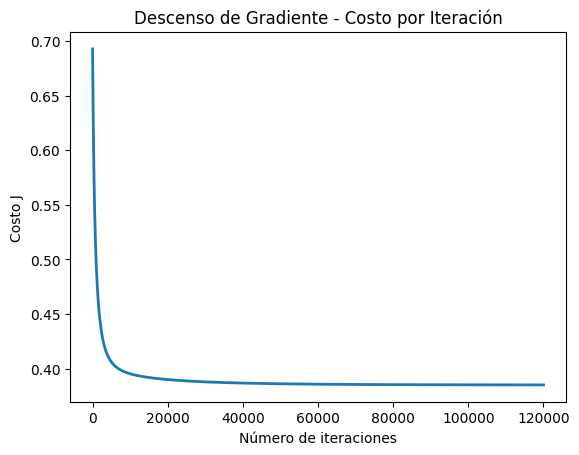

Costo final después de la optimización: 0.38496222577997735
Theta calculado por el descenso por el gradiente: [-1.51262594  0.46556136 -0.03517175  0.0551968   0.07730259  0.84143243
 -0.34181209  0.0514196  -0.22393045  0.0766051   0.39995914  2.18952827
  0.27178664  0.35834759  0.02008142]


In [47]:
import numpy as np
import matplotlib.pyplot as plt
#mi funcion sigmoide para calcular para mi clasficacion binaria
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
#funion de costo
def calcularCostoRegularizado(theta, X, y, lambda_):
    m = y.size
    h = sigmoid(X.dot(theta))
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))  # Término de regularización
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + reg_term
    return J
#desenso utilizado el costo para hallar los mejores valores de theta
def calcularDescensoGradienteRegularizado(theta, X, y, alpha, lambda_, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        reg_term = (lambda_ / m) * theta[1:]  # Término de regularización
        theta[0] -= (alpha / m) * (h - y).dot(X[:, 0])
        theta[1:] -= (alpha / m) * ((h - y).dot(X[:, 1:]) + reg_term)
        J_history.append(calcularCostoRegularizado(theta, X, y, lambda_))
    return theta, J_history

# Definir alpha, num_iters, y theta inicial
alpha = 0.003
num_iters = 120000
lambda_ = 0.0001  # Parámetro de regularización

theta = np.zeros(X_train_norm.shape[1])

# Llamar a la función de descensoGradiente
theta, J_history = calcularDescensoGradienteRegularizado(theta, X_train_norm, y_train, alpha, lambda_, num_iters)

# Graficar el costo y el numero de iteracion para ver cuanto me aserco a 0
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.title('Descenso de Gradiente - Costo por Iteración')
plt.show()

# Imprimir el costo final y losmejores thetas
print('Costo final después de la optimización:', J_history[-1])
print('Theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


In [48]:
#predigo usando el 20% de prueba de datos
def predecir(theta, X):

    probabilidades = sigmoid(X.dot(theta))

    clases_predichas = (probabilidades >= 0.5).astype(int)
    return clases_predichas

def evaluar_predicciones(theta, X, y):

    clases_predichas = predecir(theta, X)

    precision = np.mean(clases_predichas == y) * 100

    correctas = np.sum(clases_predichas == y)
    incorrectas = np.sum(clases_predichas != y)
    return precision, correctas, incorrectas


precision, correctas, incorrectas = evaluar_predicciones(theta, X_test_norm, y_test)

incorrectas_porcentaje = 100 - precision

#imprire para ver que tanto esta prediciendo usando el parametro de regularizacion
print("Precisión de las predicciones:", precision, "%")
print("Porcentaje de predicciones incorrectas:", incorrectas_porcentaje, "%")
print("Número de predicciones correctas:", correctas)
print("Número de predicciones incorrectas:", incorrectas)

Precisión de las predicciones: 82.72085167366157 %
Porcentaje de predicciones incorrectas: 17.27914832633843 %
Número de predicciones correctas: 8081
Número de predicciones incorrectas: 1688


Costo final después de la optimización: 0.3849249155668628
theta calculado por el descenso por el gradiente: [-1.50883017  0.46522743 -0.03514181  0.0552401   0.07741539  0.84182324
 -0.34213024  0.05142859 -0.22415468  0.07672299  0.40036528  2.23640667
  0.27243     0.35834223  0.01999589]


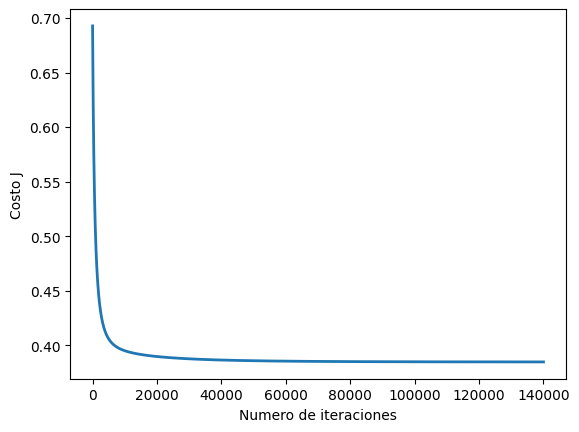

In [43]:
# vectorizacion sin regularizacion
import numpy as np
import matplotlib.pyplot as plt  # Agrega esta línea para importar pyplot
#sigmoide
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g
#funcion de costo
def calcularCosto(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

theta = np.zeros(X_train_norm.shape[1])
costo_entrenamiento = calcularCosto(theta, X_train_norm, y_train)
costo_prueba = calcularCosto(theta, X_test_norm, y_test)
# mi desenso de gradiente usando la funcion del costo
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history
#parametros
alpha = 0.003
num_iters = 120000
theta = np.zeros(X_train_norm.shape[1])
theta, J_history = descensoGradiente(theta, X_train_norm, y_train, alpha, num_iters)

plt.plot(np.arange(len(J_history)), J_history, lw=2)  # Reemplaza "pyplot" con "plt"
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')

print('Costo final después de la optimización:', J_history[-1])
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))



In [49]:
#predigo usando el 20% de datos de prueba
def predecir(theta, X):

    probabilidades = sigmoid(X.dot(theta))

    clases_predichas = (probabilidades >= 0.5).astype(int)
    return clases_predichas

def evaluar_predicciones(theta, X, y):

    clases_predichas = predecir(theta, X)

    precision = np.mean(clases_predichas == y) * 100

    correctas = np.sum(clases_predichas == y)
    incorrectas = np.sum(clases_predichas != y)
    return precision, correctas, incorrectas


precision, correctas, incorrectas = evaluar_predicciones(theta, X_test_norm, y_test)

incorrectas_porcentaje = 100 - precision

#imprimo mis reusltados
print("Precisión de las predicciones:", precision, "%")
print("Porcentaje de predicciones incorrectas:", incorrectas_porcentaje, "%")
print("Número de predicciones correctas:", correctas)
print("Número de predicciones incorrectas:", incorrectas)

Precisión de las predicciones: 82.72085167366157 %
Porcentaje de predicciones incorrectas: 17.27914832633843 %
Número de predicciones correctas: 8081
Número de predicciones incorrectas: 1688


Dado que los dos costos son muy similares (0.38496222577997735 con regularización y 0.3849249155668628 sin regularización), es difícil determinar cuál modelo es mejor solo basándose en esos valores de costo.

 Pero segun lo obserbado, si el costo con regularización es apenas ligeramente mayor que el costo sin regularización, y el uso de regularización tiene el beneficio adicional de ayudar a prevenir el sobreajuste, entonces optaría por el modelo con regularización.
La regularización puede mejorar la capacidad del modelo para generalizar bien a datos no vistos y, por lo tanto, puede ser preferible en esta situación.

mejores hiperparametros usados en el caso de regularizacion
alpha = 0.003
num_iters = 120000
lambda_ = 0.0001


mejores hiperparametros usados sin regularizacion
alpha = 0.003
num_iters = 120000
